# TP1 : PageRank 

In [1]:
import numpy as np
import os
from scipy.sparse import csr_matrix
import re

In [2]:
def createDic(fichier):
    f=open(fichier,"r")
    n=0
    dic={}
    for line in f:
        u,v= [int(x) for x in line.split()]
        if u in dic:
            dic[u].append(v)
        else :
            dic[u]=[v]
    return dic,max(dic.keys())

def produit(dic,r):
    n=len(r)
    res=np.zeros(n)
    for i in range(n):
        if i+1 in dic:
            l=dic[i+1]
            for x in l:
                res[x-1]+=(1./len(l))*r[i]
    return res

def pageRank(fichier,beta,epsilon):
    dic,n=createDic(fichier)
    ro=np.ones(n)/n
    r1=beta*produit(dic,ro)+(1-beta)*np.ones(n)/n
    while np.linalg.norm(r1-ro)>=epsilon:
        ro=r1
        r1=beta*produit(dic,ro)+(1-beta)*np.ones(n)/n
    for i in range(len(r1)):
        print (r1[i], end='')
        print(" ", end='')
        
print("Résultat Beta=1 :")
pageRank("test",1,0.001)
print('\n')
print("Résultat Beta=0.8:")
pageRank("test",0.8,0.001)

Résultat Beta=1 :
0.2860921223958333 0.14295450846354166 0.14256795247395831 0.14286295572916666 0.14295450846354166 0.14256795247395831 

Résultat Beta=0.8:
0.27150030253260804 0.1417135520208213 0.14699737805073065 0.15107783732428798 0.1417135520208213 0.14699737805073065 

In [3]:
def wiki():
    ListeWiki = 'liste.txt'
    Fichier = open(ListeWiki,'w')
    pages=os.listdir("toyset")
    for i,page in enumerate(pages):
        os.chdir("toyset")
        f=open(page,"r",encoding="utf8")
        text=f.read()
        urls = re.findall(r'a href=[\'"]?([^\'" >]+)',text)
        for url in urls:
            k=pages.index(url)
            i=pages.index(page)
            Fichier.write(str(i)+' '+str(k) +'\n')
        os.chdir("..")
    Fichier.close()
    pageRank(ListeWiki,0.8,0.001)
print("Résultat du classement des pages wikipédia, dans l'ordre alphabétique :")
wiki()

Résultat du classement des pages wikipédia, dans l'ordre alphabétique :
0.006191573961214233 0.009436907864351116 0.015832706644808806 0.04058648550583521 0.016072193824772207 0.015382514548184453 0.03672404300253092 0.014447131967737045 0.02194111892711345 0.015090589113008712 0.01856589362532228 0.016881276015459856 0.00948611693187439 0.05726114512012413 0.009598526954742627 0.00975250011040767 0.017370513362978065 0.010741136782735803 0.0151681509123031 0.020735951318447868 0.019041054200439174 0.016455438681685718 0.01962837123286926 0.013566707234894728 0.009741848159447682 0.022111522471551532 0.041230038508847947 0.00675726697349051 0.004212994643278345 0.02215606774045636 0.021048521991566538 0.0036363636363636355 0.016188689090995256 0.010630457188184499 0.011380776170588271 0.009941458021507733 0.007146057220550024 0.02687878072313579 0.014427084694191067 0.03672149501644434 0.01451562415323798 0.009074838035572916 0.04527484783248473 0.005923051593808525 0.03060226380353075

# TP2 : Clustering 


In [4]:
import csv
import random
import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
def chercherData(path):
    ListeEntreprises=[]
    M=np.array(pd.read_csv(path))
    for i in range(1,len(M)):
        for j in range(1,len(M[0])):
            M[i][j]=float(M[i][j])
    return (M)

def distance(x,y):
    n=len(x)
    m=len(y)
    if n!=m :
        print("c'est une problème de taille")
    else :
        d=0
        for i in range(n):
            d=d+(float(x[i])-float(y[i]))**2
    return np.sqrt(d)

def K_mean(nc,max_i,ni,X):
    Z=[X[j][1:] for j in range(len(X))]
    kmeans = KMeans(init='random', n_clusters=nc, max_iter=max_i, n_init=ni).fit(Z)
    return kmeans

def KmeanListeNoms(nc,max_i,ni,X):
    kmean=K_mean(nc,max_i,ni,X)
    clust=kmean.labels_
    clusters=[[] for i in range(nc)]
    for i in range(len(X)):
        clusters[clust[i]-1].append(X[i][0])
    print ("SSE = " + str(calculSSE(kmean,X)))
    return clusters

def calculSSE(kmean,X):
    centers=kmean.cluster_centers_
    clust=kmean.labels_
    x=len(X)
    k=len(centers)
    sum=0
    for i in range(x):
        sum=sum+np.square(distance(X[i][1:],centers[clust[i]-1]))
    return sum

X=chercherData("data.csv")

### Question1


In [6]:
print("Exemple de clustering :")
KmeanListeNoms(8,10000,100,X)

Exemple de clustering :
SSE = 8403.048663729325


[['Merck'],
 ['Hewlett-Packard'],
 ['DuPont', 'Caterpillar'],
 ['IBM',
  'The Home Depot',
  'Intel',
  'Wal-Mart',
  'United Technologies',
  'Travelers',
  '3M'],
 ['Cisco Systems'],
 ['Alcoa'],
 ['Kraft',
  'Verizon',
  'Procter & Gamble',
  'General Electric',
  'AT&T',
  'McDonalds',
  'Coca-Cola',
  'Johnson & Johnson'],
 ['American Express',
  'Boeing',
  'Chevron',
  'Bank of America',
  'Microsoft',
  'Walt Disney',
  'Pfizer',
  'ExxonMobil',
  'JPMorgan Chase']]

### Question 2

a) Max_iter et n_init semblent être deux paramètres très importants pour le bon focntionnement de l'algorithme Kmean. En effet, Max_iter donne le nombre de fois où doit être effectué la réaffectation des points à un centroïde et le calcul des nouveaux centroïdes. Si Max_iter est trop petit, l'algorithme n'a pas le temps de converger. n_init donne le nombre d'échantillons initiaux sur lequel on fait tourner l'algorithme, comme la position des centroides initiaux est déterminante sur cet algorithme, plus n_init est grand, meilleurs les résultats sont.  

b) On remarque d'après les figures suivantes que augmenter ces deux paramètres permet géneralement d'obtenir de meilleurs résultats, mais pas toujours, tout d'abord parcequ'il y a une grande part d'aléatoire dans l'algorithme de Kmean, mais aussi parceque les clustering ne s'améliorent plus une fois que les deux paramètres ont atteint un certain seuil.

Comparons la valeur du SSE pour différentes valeurs de max_iter à nb_inti fixé (nb_init =100).

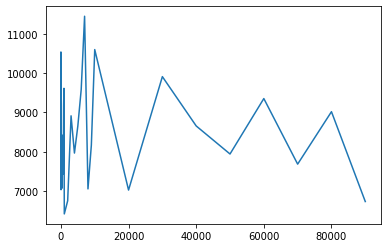

In [7]:
nb_init=100
value=[[],[]]
for i in range(5):
    for j in range(1,10):
        max_iter=j*(10**i)
        sse=calculSSE(K_mean(8,max_iter,nb_init,X),X)
        value[0].append(max_iter)
        value[1].append(sse)
plt.plot(value[0],value[1])
plt.show()

Au delà d'un certain seuil, il semble que max_iter n'ai plus beaucoup d'effet sur la qualité du clustering. On remarque cependant que, en moyenne, le SSE des clusering avec max_iter>10 000 est plus faible que les autres, même si on observe certaines exceptions.

Comparons la valeur du SSE pour différentes valeurs de nb_init à max_iter fixé (max_iter = 10000).

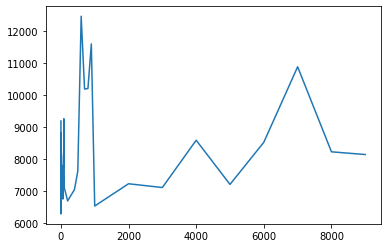

In [8]:
max_iter=10000
value=[[],[]]
nb_init=1
for i in range(4):
    for j in range(1,10):
        nb_init=j*(10**i)
        sse=calculSSE(K_mean(8,max_iter,nb_init,X),X)
        value[0].append(nb_init)
        value[1].append(sse)
plt.plot(value[0],value[1])
plt.show()

Plus Nb_init est grand, plus le sse du clustering est faible, cependant à partir d'un certain seuil on n'observe plus d'amélioration notable.

Nous choisissons max_iter=20000 et nb_init=4000.


### Question 3 :

In [9]:
KmeanListeNoms(8,20000,4000,X)

SSE = 9737.478213654143


[['Chevron', 'DuPont', 'Caterpillar', 'ExxonMobil'],
 ['American Express',
  'Boeing',
  'Microsoft',
  'Walt Disney',
  'General Electric',
  'JPMorgan Chase'],
 ['Hewlett-Packard'],
 ['Kraft',
  'IBM',
  'The Home Depot',
  'Procter & Gamble',
  'Intel',
  'Wal-Mart',
  'AT&T',
  'United Technologies',
  'Travelers',
  'McDonalds',
  'Coca-Cola',
  '3M',
  'Johnson & Johnson'],
 ['Bank of America'],
 ['Cisco Systems'],
 ['Alcoa'],
 ['Verizon', 'Merck', 'Pfizer']]

Le clustering obtenu : SSE = 6470

Cluster technologie = 'American Express','Boeing', 'Microsoft','IBM','The Home Depot','Walt Disney', 'Wal-Mart','General Electric','United Technologies','Travelers','3M'
  
Cluster pharmacie et agro-alimentaire = 'Kraft', 'Verizon', 'Procter & Gamble', 'AT&T', 'Merck', 'McDonalds', 'Coca-Cola','Johnson & Johnson'
 
Cluster : 'Intel'

Cluster industrie lourde : 'DuPont', 'Caterpillar', 'Alcoa'

Cluster : 'Cisco Systems'

Cluster : 'Bank of America'

Cluster : Hewlett-Packard'

Cluster Petroliers : 'Chevron', 'Pfizer', 'ExxonMobil', 'JPMorgan Chase'

Cette partie n'est pas nécessaire, j'ai recodé l'algorithme KMean, n'ayant pas vu qu'une fonction existait déjà. Je le laisse ici si vous souhaitez le regarder.

Utilisation du PCA pour visualiser les clusters:


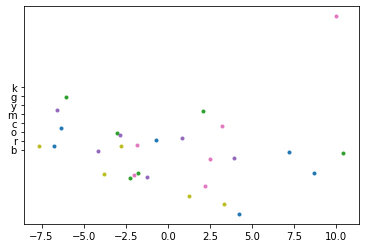

Sum of squares errors = 1654.937766779677
Liste des clusters obtenus:


[['Bank of America', 'Pfizer'],
 ['Kraft',
  'Verizon',
  'IBM',
  'Procter & Gamble',
  'Wal-Mart',
  'AT&T',
  'Travelers',
  'McDonalds',
  'Coca-Cola',
  '3M',
  'Johnson & Johnson'],
 ['Chevron', 'DuPont', 'Caterpillar', 'Alcoa', 'ExxonMobil', 'JPMorgan Chase'],
 ['The Home Depot'],
 ['Intel'],
 ['Merck'],
 ['Boeing',
  'Microsoft',
  'Walt Disney',
  'Hewlett-Packard',
  'General Electric',
  'United Technologies'],
 ['Cisco Systems']]

In [10]:
def chercherData(path):
    ListeEntreprises=[]
    M=np.array(pd.read_csv(path))
    for i in range(1,len(M)):
        for j in range(1,len(M[0])):
            M[i][j]=float(M[i][j])
    return (M)

def distance(x,y):
    n=len(x)
    m=len(y)
    if n!=m :
        print("c'est une problème de taille")
    else :
        d=0
        for i in range(n):
            d=d+(float(x[i])-float(y[i]))**2
    return np.sqrt(d)

def etape_k_mean(K,M): ##affectation et calcul des nouveaux centroides 
    K2=[]
    k=len(K)
    m=len(M)
    clusters=[[] for i in range(k)]
    for i in range(1,m):
        dist=[distance(M[i][1:],K[j]) for j in range(k)]
        indexCentroid=dist.index(min(dist))
        clusters[indexCentroid].append(i)   ##clusters = [[numéros des entreprises du cluster1],[numéros des entreprises du cluster2],...]
    for i in range(k):
        K2=calculCentroids(clusters,M)
    return (K2,clusters)

def calculCentroids(clusters,M):
    K=[]
    m=len(M[0])-1
    k=len(clusters)
    for i in range(k): 
        sum=np.zeros(m)
        n=len(clusters[i])
        for elmt in clusters[i]:
            sum = sum + M[elmt][1:]
        sum=sum/n
        K.append(sum)
    return K
            
        
def initialisation(path,k):
    M=chercherData(path)
    l=random.sample([i for i in range(1,len(M))],k)
    K=[M[l[i]][1:] for i in range(k)]
    return M,K

def k_mean(path,k):
    M,K1=initialisation(path,k) ##K=liste des c
    K2,clusters=etape_k_mean(K1,M)  
    while not( np.array_equal(K1,K2) ):
        K1=K2
        K2,clusters=etape_k_mean(K1,M)
    clusters_nom=[[M[j][0] for j in cluster] for cluster in clusters ]
    afficher(clusters,M)
    print('Sum of squares errors = '+ str(calculsse(clusters,M,K2)))
    print("Liste des clusters obtenus:")
    return(clusters_nom)
    

def afficher(clusters,M):
    print("Utilisation du PCA pour visualiser les clusters:")
    k=len(clusters)
    points=[M[j][1:] for j in range(1,len(M))]
    pca=decomposition.PCA(n_components=2)
    liste=(pca.fit_transform(points))
    color=['b','r','o','c','m','y','g','k','w']
    for i in range(k):
        for elmt in clusters[i]:
            plt.plot(liste[elmt-1][0],liste[elmt-1][1],'.',color[i])
    plt.show()
    
def calculsse(clusters,M,K):
    k=len(K)
    sum=0
    for i in range(k):
        res=0
        for elmt in clusters[i]:
            res=res+(distance(M[elmt][1:],K[i]))**2
        sum=sum+res
    return sum
    

k_mean("data.csv",8)